<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/cluster_na_descricao_produto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fazendo Cluster por Descrição

Neste notebook será feito clusterização a partir da clusterização dos produtos com base neste artigo na medium (que pode ser acessado [aqui](https://medium.com/bexs-io/clusteriza%C3%A7%C3%A3o-de-textos-com-k-means-46254fe31bf6)).

In [ ]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/dataset_com_cluster.csv')
mercari.drop('Unnamed: 0',axis=1,inplace=True)
mercari.head()


,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,cluster
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2,0
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1,0
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11,0
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4,0
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11,0


In [ ]:
mercari.dropna(inplace=True)

In [ ]:
# Aplicando tf id vectorizer nas descrição dos produtos
des = mercari.item_description
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(des)

In [ ]:
X.shape

(1036470, 128619)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

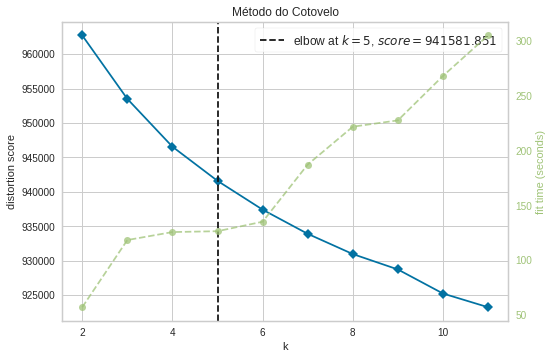

In [ ]:
kmeans = KMeans()
elvi = KElbowVisualizer(kmeans,k=(2,12),title='Método do Cotovelo')
elvi.fit(X)
elvi.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)


In [ ]:
mercari['cluster_texto'] = kmeans.labels_

In [ ]:
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,cluster,cluster_texto
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2,0,1
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1,0,1
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11,0,2
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4,0,0
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11,0,1


In [ ]:
mercari['cluster_texto'].value_counts()

1    804651
2    117939
0     57821
3     56059
Name: cluster_texto, dtype: int64

In [ ]:
lista_clus = []
for i in mercari['cluster_texto'].value_counts().index:
  lista_clus.append(f'Cluster {i}')

<BarContainer object of 4 artists>

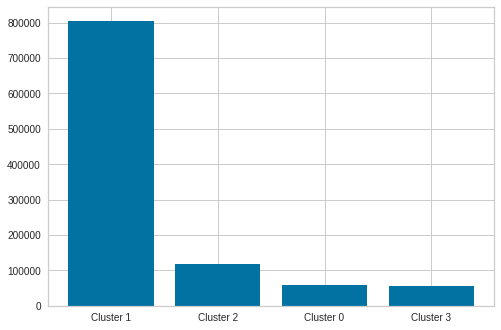

In [ ]:
plt.bar(lista_clus,mercari['cluster_texto'].value_counts())

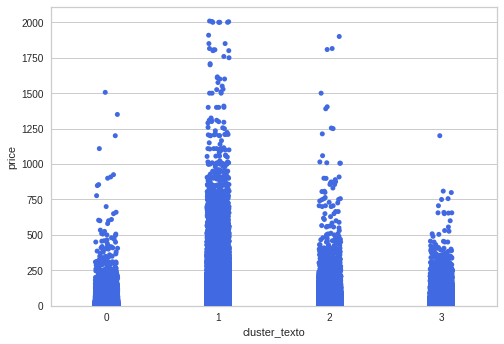

In [ ]:
sns.stripplot(x='cluster_texto',y='price',data=mercari,color='royalblue')
plt.ylim(bottom=0);

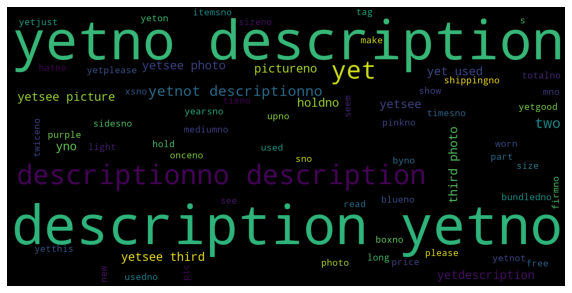

In [ ]:
juntar_cluster_texto_0 = ''.join(s for s in mercari[mercari['cluster_texto']==0]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_cluster_texto_0)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

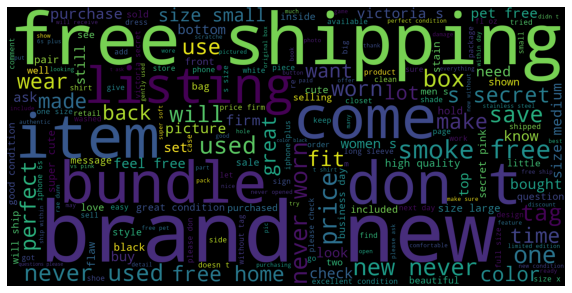

In [ ]:
juntar_cluster_texto_1 = ''.join(s for s in mercari[mercari['cluster_texto']==1]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_cluster_texto_1)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

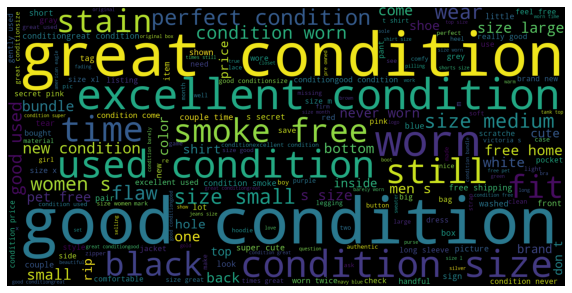

In [ ]:
juntar_cluster_texto_2 = ''.join(s for s in mercari[mercari['cluster_texto']==2]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_cluster_texto_2)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

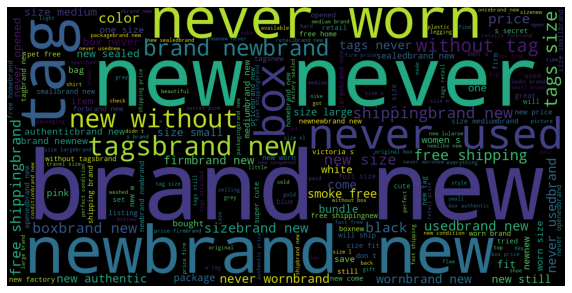

In [ ]:
juntar_cluster_texto_3 = ''.join(s for s in mercari[mercari['cluster_texto']==3]['item_description'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_cluster_texto_3)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

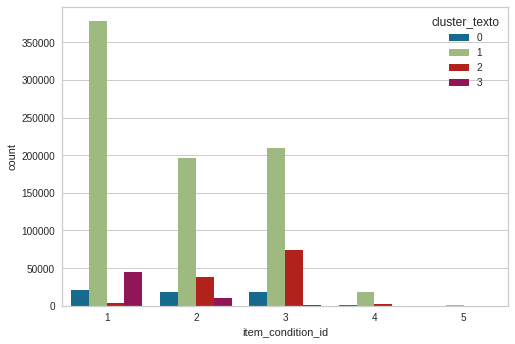

In [ ]:
sns.countplot(x='item_condition_id',data=mercari,hue='cluster_texto')

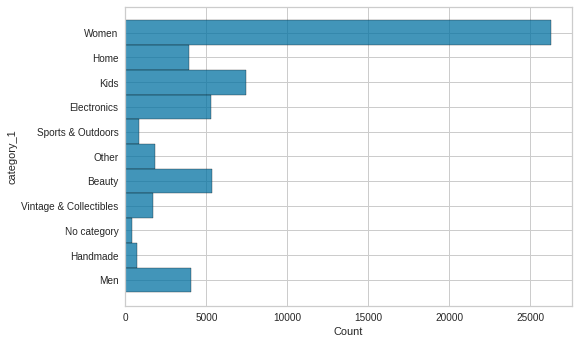

In [ ]:
sns.histplot(y='category_1',data=mercari[mercari['cluster_texto']==0])

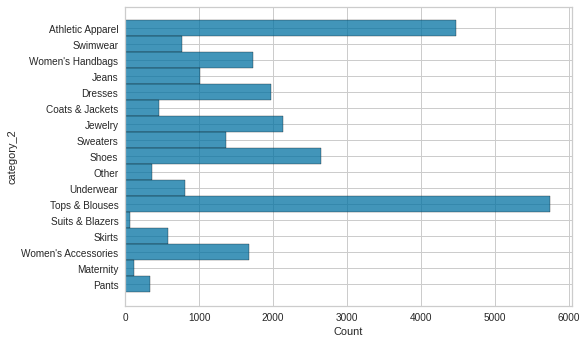

In [ ]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster_texto']==0) & (mercari['category_1']=='Women')])

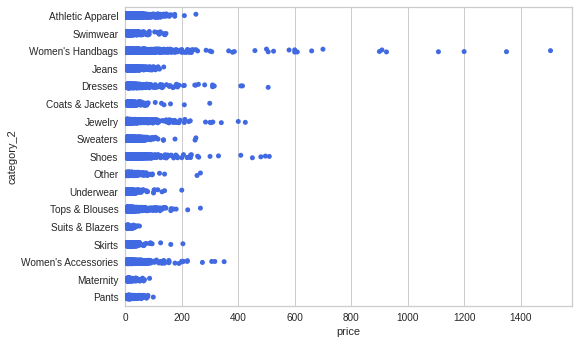

In [ ]:
sns.stripplot(y='category_2',x='price',
              data=mercari[(mercari['cluster_texto']==0) & (mercari['category_1']=='Women')],
              color='royalblue')
plt.xlim(left=0);

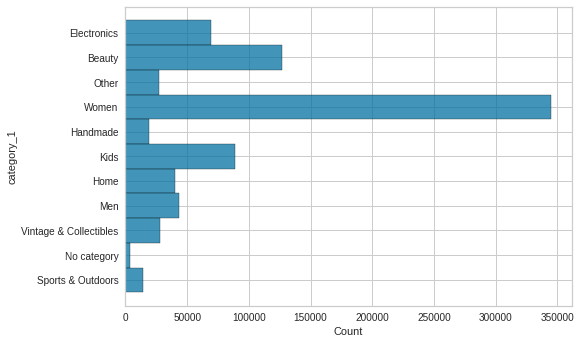

In [ ]:
sns.histplot(y='category_1',data=mercari[mercari['cluster_texto']==1])

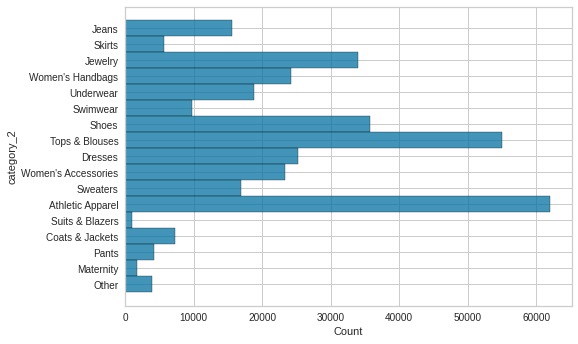

In [ ]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster_texto']==1) & (mercari['category_1']=='Women')])

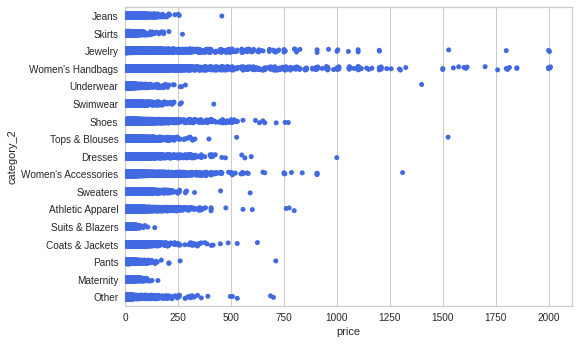

In [ ]:
sns.stripplot(y='category_2',x='price',
              data=mercari[(mercari['cluster_texto']==1) & (mercari['category_1']=='Women')],
              color='royalblue')
plt.xlim(left=0);

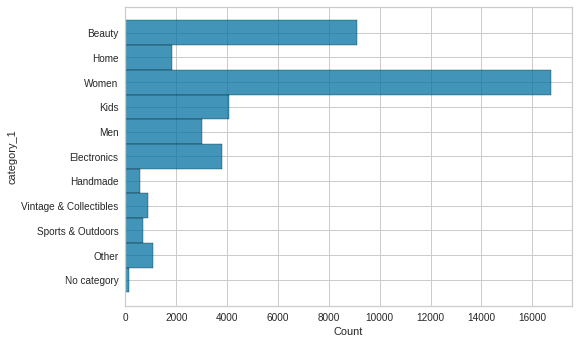

In [ ]:
sns.histplot(y='category_1',data=mercari[mercari['cluster_texto']==2])

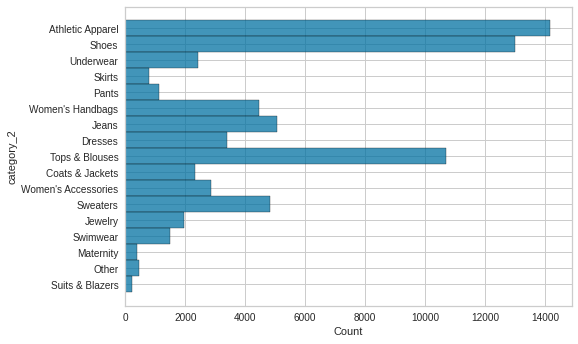

In [ ]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster_texto']==2) & (mercari['category_1']=='Women')])

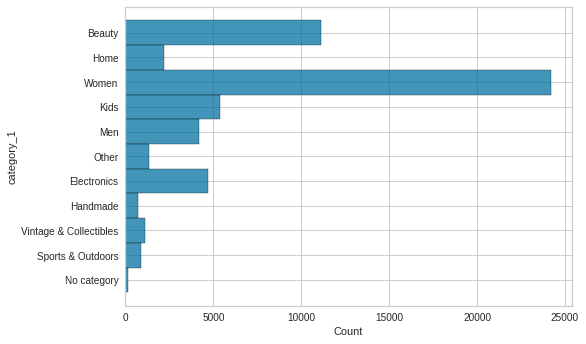

In [ ]:
sns.histplot(y='category_1',data=mercari[mercari['cluster_texto']==3])

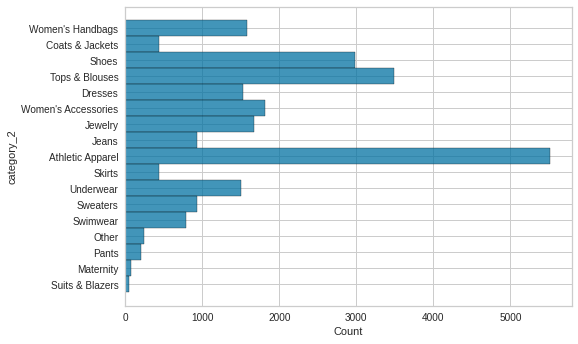

In [ ]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster_texto']==3) & (mercari['category_1']=='Women')])